<a href="https://colab.research.google.com/github/shindeaditya/Data-Science/blob/main/Fraudulent_transition_byAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


In [ ]:
df = pd.read_csv(r'C:\Users\aditya\Downloads\Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#df_original=df.copy() #saving origanl data if required

In [ ]:
df.shape

(6362620, 11)

Eliminating duplicate values

In [ ]:
df.drop_duplicates(inplace=True)

Checking for more info 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 582.5+ MB


In [ ]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Checking multi-collinearity

In [ ]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.00,0.02,-0.01,-0.01,0.03,0.03,0.03,0.00
amount,0.02,1.00,-0.00,-0.01,0.29,0.46,0.08,0.01
oldbalanceOrg,-0.01,-0.00,1.00,1.00,0.07,0.04,0.01,0.00
newbalanceOrig,-0.01,-0.01,1.00,1.00,0.07,0.04,-0.01,0.00
oldbalanceDest,0.03,0.29,0.07,0.07,1.00,0.98,-0.01,-0.00
newbalanceDest,0.03,0.46,0.04,0.04,0.98,1.00,0.00,-0.00
isFraud,0.03,0.08,0.01,-0.01,-0.01,0.00,1.00,0.04
isFlaggedFraud,0.00,0.01,0.00,0.00,-0.00,-0.00,0.04,1.00


<Axes: >

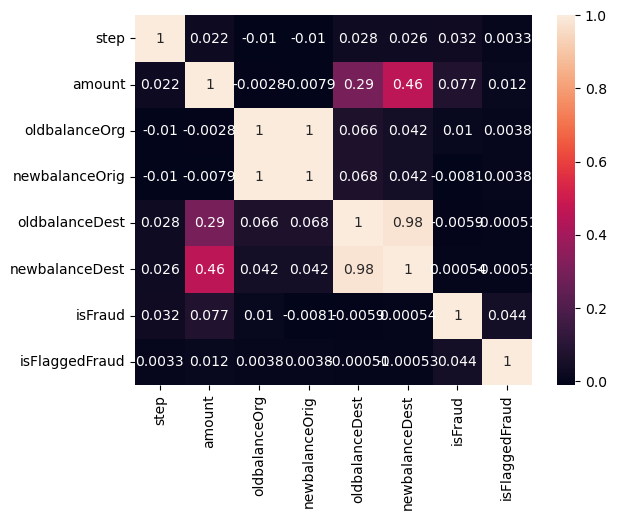

In [ ]:
sns.heatmap(df.corr(),annot=True)

As we can see there is  multi-collinearity in oldbalanceOrg &newbalanceOrig also oldbalanceDest & newbalanceDest. It shows many data is similar in between they and if we want we can drop one of them column.

In [ ]:
df.drop(columns=['nameOrig','nameDest'],inplace=True)

# Some first Glance Analysis

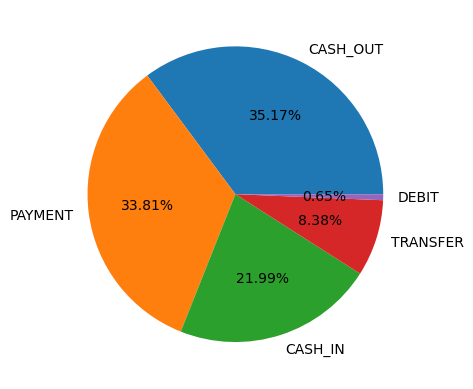

In [ ]:
values = df['type'].value_counts().values
labels = df['type'].value_counts().keys()
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.show()

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

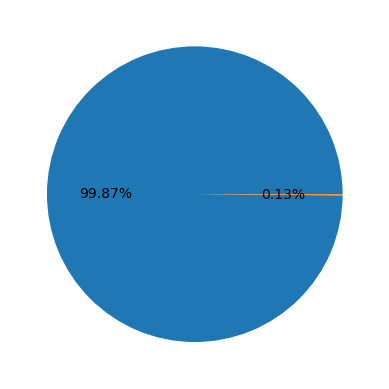

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
isfraud=df['isFraud'].value_counts()
plt.pie(isfraud,autopct='%.2f%%')
plt.show()
isfraud

As we can see only few around 8213 transitions are fraud.

Checking for Outliers in numerical continuouse data

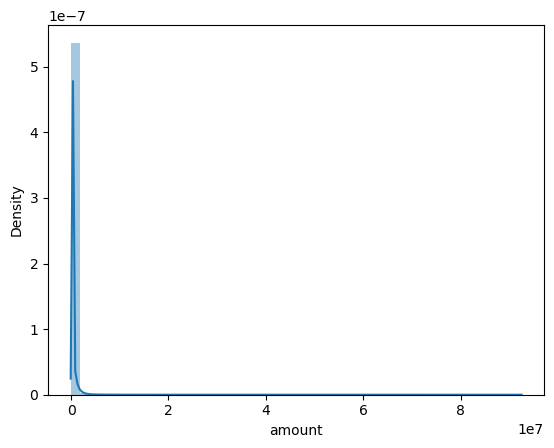

In [ ]:
sns.distplot(df['amount'], bins=50)
plt.show()

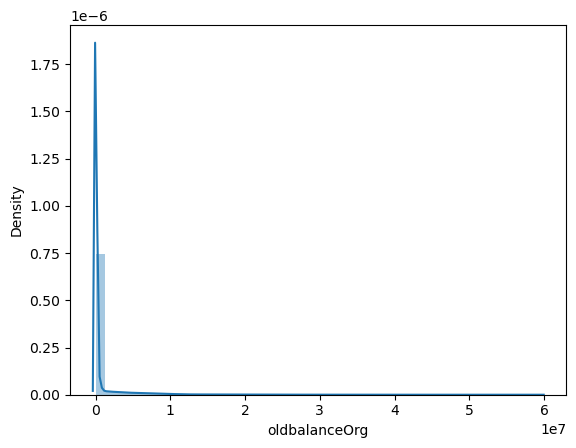

In [ ]:
sns.distplot(df['oldbalanceOrg'], bins=50)
plt.show()

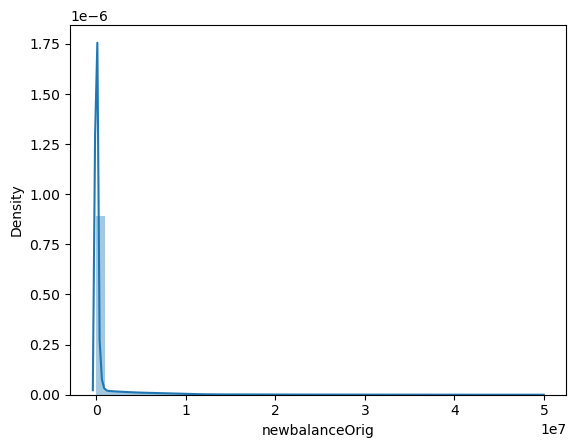

In [ ]:
sns.distplot(df['newbalanceOrig'], bins=50)
plt.show()

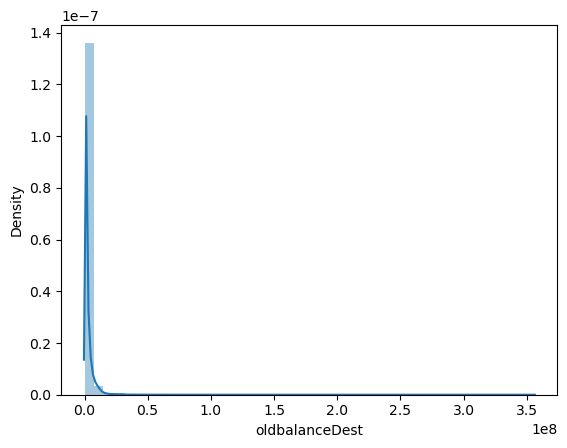

In [ ]:
sns.distplot(df['oldbalanceDest'], bins=50)
plt.show()

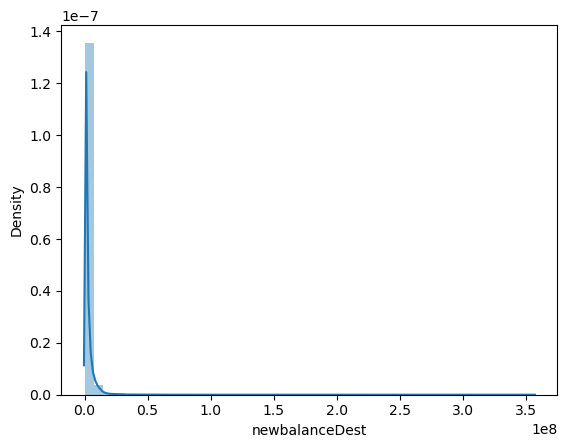

In [ ]:
sns.distplot(df['newbalanceDest'], bins=50)
plt.show()

In [ ]:
def out_treat(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_whisker = q1 - 1.5 * IQR
    upper_whisker = q3 + 1.5 * IQR
    cond=(df[col]>lower_whisker)&(df[col]<upper_whisker)
    temp = df.loc[cond]
    return temp[col]

In [ ]:
column=['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']
for i in column:
    df[i]=out_treat(df,i)

seprating features and labels.

In [ ]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

Lets convert object data into int form by Encoding.

In [ ]:
X_enc=X.copy()
for col in X.columns:
    le = LabelEncoder()
    X_enc[col]=le.fit_transform(X[col].values)
    
X_enc.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0,3,710400,587897,1157557,0,0,0
1,0,3,141767,140919,336044,0,0,0
2,0,4,13666,1672,0,0,0,0
3,0,1,13666,1672,0,82843,0,0
4,0,3,822964,230032,456430,0,0,0


Spliting data into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_enc,y, test_size=0.3)

# Applying different models

Decision Tree

In [ ]:
dt=DecisionTreeClassifier(criterion='gini', max_depth=9)
dt.fit(X_train, y_train)
dt.score(X_train,y_train), dt.score(X_test, y_test)

(0.9995758710360557, 0.9995615013940798)

In [ ]:
dt_pred=dt.predict(X_test)
print(classification_report(y_test, dt_pred))
(accuracy_score(y_test, dt_pred))*100

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906344
           1       0.96      0.69      0.80      2442

    accuracy                           1.00   1908786
   macro avg       0.98      0.84      0.90   1908786
weighted avg       1.00      1.00      1.00   1908786



99.95615013940798

Random Forest

In [ ]:
#rf=RandomForestClassifier(100)
rf.fit(X_train,y_train)
rf.score(X_train,y_train), rf.score(X_test,y_test)

KeyboardInterrupt: 

In [ ]:
rf_pred=dt.predict(X_test)
print(classification_report(y_test, rf_pred))
(accuracy_score(y_test, rf_pred))*100

Support Vector Machine

In [ ]:
#svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_train,y_train), svm.score(X_test,y_test)

In [ ]:
svm_pred=dt.predict(X_test)
print(classification_report(y_test, svm_pred))
(accuracy_score(y_test, svm_pred))*100

K-Nearest Neighbours

In [ ]:
#knn=KNeighborsClassifier(n_neighbors=21, metric='manhattan')
knn.fit(X_train,y_train)
knn.score(X_train,y_train), knn.score(X_test,y_test)

In [ ]:
knn_pred=dt.predict(X_test)
print(classification_report(y_test, knn_pred))
(accuracy_score(y_test, knn_pred))*100

Logistic Regression

In [ ]:
#logr=LogisticRegression()
logr.fit(X_train,y_train)
logr.score(X_train,y_train), logr.score(X_test,y_test)

In [ ]:
logr_pred=dt.predict(X_test)
print(classification_report(y_test, logr_pred))
(accuracy_score(y_test, logr_pred))*100

XGBoost

In [ ]:
#xgb=XGBClassifier(n_estimators=50, max_depth=9)
xgb.fit(X_train,y_train)
xgb.score(X_train,y_train), xgb.score(X_test,y_test)

In [ ]:
xgb_pred=dt.predict(X_test)
print(classification_report(y_test, xgb_pred))
(accuracy_score(y_test, xgb_pred))*100

**As data contain more than 20lakh data values for fitting it takes much time to train and test.
I've knoweledge how this algorithms work under the hood but currently due to time restriction I'll be not running this models now but you can check for my understanding of that algorithm.** 

Hyperparameter Tunning

In [ ]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}

random_search = RandomizedSearchCV(dt, param_distributions=param_grid, cv=5, n_iter=10)
random_search.fit(X_enc, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=9),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': [1, 3, 10],
                                        'min_samples_split': [2, 3, 10]})

In [ ]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=3)

In [ ]:
random_search.best_score_

0.9989350299090626

As we can see, we can obtain 99.89% acuuracy in decision tree using above paprmeters. We also need to check for other models too.

**We can also use GridSearchCV but it might take long to obtain best parameters as it search for every possibility one after another in pattern.**